# Linear Regression

## 推导

模型
$$\large\displaystyle y = \hat{X}w \tag{1.1}$$
其中，$\hat{X}$ 维度是 $m \times (n+1)$，最后一列全是1；$w$ 的维度是 $(n+1) \times 1$，最后一个元素表示偏置b（或者截距）。

目标函数

$$\large\displaystyle J(w) = \frac{1}{2m} (y - \hat{X}w)^{T}(y - \hat{X}w) \tag{1.2}$$
一阶、二阶导数如下
$$\large\displaystyle \frac{\partial{J(w)}}{\partial{w}} = \frac{1}{m}\hat{X}^{T}(\hat{X}w-y) \tag{1.3}$$

$$\large\displaystyle \frac{\partial{J(w)}}{\partial{w}\partial{w^{T}}} = \frac{1}{m}\hat{X}^{T}\hat{X}{\tag{1.4}}$$
当导数等于0时，有
$$\large\displaystyle \hat{X}^{T}\hat{X}w = \hat{X}^{T}y \tag{1.5}$$

这里 $\hat{X}^{T}\hat{X}$ 为半正定矩阵（证明见1.2.1）：
- 当 $\hat{X}^{T}\hat{X}$ 满秩时，$\frac{\partial{J(w)}}{\partial{w}\partial{w^{T}}}$ 为严格正定矩阵时，$J(w)$ 在一阶导数等于0的点处取得极小值（判定定理见1.2.2）。此时，$\hat{w} = (\hat{X}^{T}\hat{X})^{-1} \hat{X}^{T}y$，且 $\hat{X}^{T}\hat{X}$ 可逆，故 $\hat{w}$ 唯一，从而 $J(w)$ 在此处取得最小值。

- 当 $\hat{X}^{T}\hat{X}$ 不是满秩时，由 $(1.5)$ 可以解出无穷多个 $\hat{w}$ 。$\hat{w}$ 为可疑极值点，需要用其它方法来判定。
此时，可以使用梯度下降法来求解。
$$\large\displaystyle w_{new} = w_{old} - \alpha \frac{\partial{J(w)}}{\partial{w}}$$

## 相关证明及定理

### 半正定矩阵的证明

证明：$\hat{X}^{T}\hat{X}$ 为半正定矩阵。

设 $\lambda$ 和 $\xi (\xi \neq 0)$ 分别为矩阵 $\hat{X}^{T}\hat{X}$ 的特征值和对应的特征向量。则有
$$\hat{X}^{T}\hat{X}\xi = \lambda \xi $$
在等式两边右乘 $\xi^{T}$，有
$$\xi^{T}\hat{X}^{T}\hat{X}\xi = \lambda \xi^{T} \xi$$
则
$$\lambda = \frac{|\hat{X}\xi|^{2}}{|\xi|^{2}} \geq 0$$
故 $\hat{X}^{T}\hat{X}$ 为半正定矩阵。

### Hessian矩阵判断极值

![avatar](HessianMatrix.png)

## 实现

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
plt.style.use("ggplot")
%matplotlib inline

In [2]:
class LinearRegression:

    def __init__(self, max_iter=200, learning_rate=0.01):
        self.w = None
        self.max_iter = max_iter
        self.learning_rate = learning_rate
        self.cost = []

    def fit(self, X, y):
        m, n = X.shape
        n += 1
        X = np.hstack((X, np.ones((m, 1))))
        self.w = np.random.normal(size=(n, 1))
        y = y.reshape((m, 1))
        it = 0
        while it < self.max_iter:
            dw = X.T @ (X @ self.w - y) / m
            self.w = self.w - self.learning_rate * dw
            c = np.power(y - X @ self.w, 2).mean()  / 2
            self.cost.append(c)
            it += 1

        return self

    def predict(self, X):
        m, n = X.shape
        n += 1
        X = np.hstack((X, np.ones((m, 1))))
        y_ = X @ self.w
        return y_

In [3]:
X, y = datasets.load_diabetes(return_X_y=True)
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
# 标准化之后可以加快梯度下降收敛的速度

In [4]:
reg = LinearRegression(max_iter= 100, learning_rate= 0.1)
reg.fit(X, y)
y_ = reg.predict(X)

(442, 10)
(442, 10)


Text(0.5, 0, 'No. of iterations')

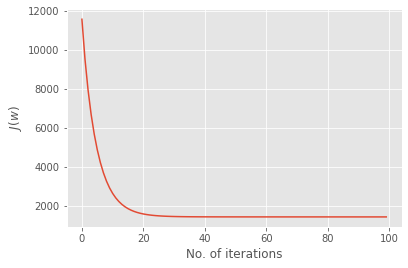

In [90]:
it = [i for i in range(len(reg.cost))]
plt.plot(it, reg.cost)
plt.ylabel("$J(w)$")
plt.xlabel("No. of iterations")

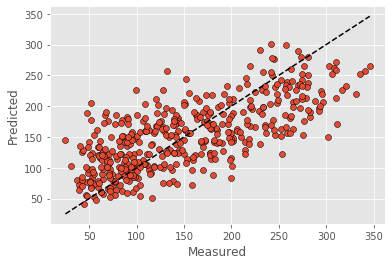

In [91]:
plt.scatter(y, y_, edgecolors=(0, 0, 0))
plt.xlabel("Measured")
plt.ylabel("Predicted")
x = np.linspace(y.min(), y.max())
plt.plot(x, x, '--k')

Text(0.5, 1.0, 'weights')

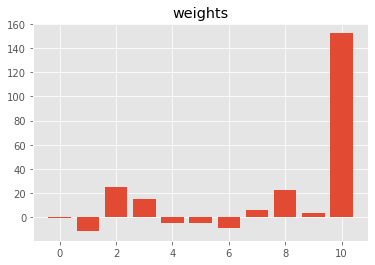

In [92]:
n = X.shape[1] + 1
plt.bar([i for i in range(n)],reg.w.reshape((-1,)))
plt.title("weights")

## 线性回归推广 

###  Ridge Regression

在线性回归的基础上添加一个$l_{2}$的正则项，目标函数为
$$\large\displaystyle J(w) = \frac{1}{2m} [(y - \hat{X}w)^{T}(y - \hat{X}w) + \lambda w^{T}w]$$

一阶导数为
$$\large\displaystyle \frac{\partial{J(w)}}{\partial{w}} = \frac{1}{m}[\hat{X}^{T}(\hat{X}w-y) + \lambda w]$$

梯度下降

$$\large\displaystyle w_{new} = w_{old} - \alpha \frac{\partial{J(w)}}{\partial{w}}$$

In [104]:
class RidgeRegression:

    def __init__(self, max_iter=200, learning_rate=0.001, alpha=1.0):
        self.w = None
        self.max_iter = max_iter
        self.learning_rate = learning_rate
        self.alpha = alpha
        self.cost = []

    def fit(self, X, y):
        m, n = X.shape
        n += 1
        X = np.hstack((X, np.ones((m, 1))))
        self.w = np.random.normal(size=(n, 1))
        y = y.reshape((m, 1))
        it = 0
        while it < self.max_iter:
            dw = (X.T @ (X @ self.w - y) + self.alpha * self.w) / m
            self.w = self.w - self.learning_rate * dw
            c = (np.power(y - X @ self.w, 2) +
                 self.alpha * self.w.T @ self.w).mean() / 2
            self.cost.append(c)
            it += 1

        return self

    def predict(self, X):
        m, n = X.shape
        n += 1
        X = np.hstack((X, np.ones((m, 1))))
        y_ = X @ self.w
        return y_


In [137]:
reg1 = RidgeRegression(max_iter= 1000, learning_rate= 0.011, alpha=0.01)
reg1.fit(X, y)
y_ = reg1.predict(X)

Text(0.5, 0, 'No. of iterations')

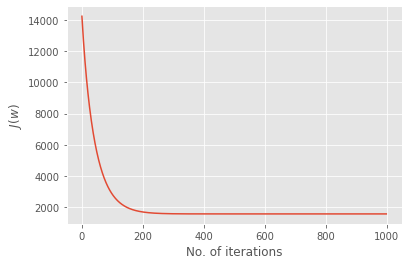

In [138]:
it = [i for i in range(len(reg1.cost))]
plt.plot(it, reg1.cost)
plt.ylabel("$J(w)$")
plt.xlabel("No. of iterations")

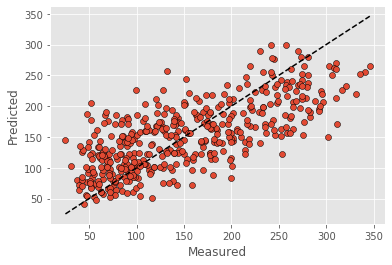

In [139]:
plt.scatter(y, y_, edgecolors=(0, 0, 0))
plt.xlabel("Measured")
plt.ylabel("Predicted")
x = np.linspace(y.min(), y.max())
plt.plot(x, x, '--k')

Text(0.5, 1.0, 'weights')

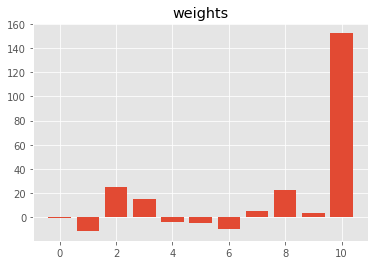

In [140]:
n = X.shape[1] + 1
plt.bar([i for i in range(n)],reg1.w.reshape((-1,)))
plt.title("weights")

# Logistic Regression

## 推导 

损失函数
$$
\begin{array}{rcl}
\large\displaystyle J(w) 
& = & \large\displaystyle - \frac{1}{m} \sum^{m}_{i=1} [ y^{(i)}\ln{h(x^{(i)})} + (1 - y^{(i)})\ln(1 - h(x^{(i)}))] \\
& = & \large\displaystyle - \frac{1}{m} [y^{T} ln(h(X)) + (1 - y)^{T} ln(1 - h(X)) ]
\end{array}
$$

$$\large\displaystyle h(x) = g(xw) = \frac{1}{1 + e^{-xw}}$$

一阶导数为
$$
\begin{array}{rcl}
\large\displaystyle \frac{\partial{J(w)}}{\partial{w_{j}}} 
& = & \large\displaystyle - \frac{1}{m} \sum^{m}_{i=1} [ y^{(i)} \frac{\frac{\partial{h(x^{(i)})}}{\partial{w_{j}}}}{h(x^{(i)})} + (1 - y^{(i)}) \frac{- \frac{\partial{h(x^{(i)})}}{\partial{w_{j}}} }{1 - h(x^{(i)})} ] \\
& = & \large\displaystyle - \frac{1}{m} \sum^{m}_{i=1} [ y^{(i)} \frac{h(x^{(i)})(1 - h(x^{(i)}))}{h(x^{(i)})} x^{(i)}_{j} + (1 - y^{(i)}) \frac{- h(x^{(i)}) (1 - h(x^{(i)})) }{1 - h(x^{(i)})} x^{(i)}_{j} ] \\
& = & \large\displaystyle \frac{1}{m} \sum^{m}_{i=1} (h(x^{(i)}) - y^{(i)}) x^{(i)}_{j}
\end{array}
$$

$$\large\displaystyle
\text{向量化}\Rightarrow
\frac{\partial{J(w)}}{\partial{w}} = \frac{1}{m} X^{T} (h(X) - y)
$$

梯度下降
$$\large\displaystyle
w = w - \alpha \frac{\partial{J(w)}}{\partial{w}}
$$

预测
$$\large\displaystyle
\hat{y} = \left\{ {1,\hspace{9pt} h(x) \geq 0.5}
\atop{0,\hspace{9pt} h(x) < 0.5}
\right.
$$

## 实现

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler
plt.style.use("ggplot")
%matplotlib inline

In [ ]:
def sigmoid(z):
    return 1.0 / (1 + np.exp(-z))


class LogisticRegression:

    def __init__(self, max_iter=200, learning_rate=0.01):
        self.max_iter = max_iter
        self.learning_rate = learning_rate
        self.w = None
        self.cost = []
        self.acc = []

    def fit(self, X, y):
        m, n = X.shape
        y = y.reshape((m, 1))
        X_ = np.hstack((X, np.ones((m, 1))))
        n += 1
        np.random.seed(1.0)
        self.w = np.random.poisson(size = (n, 1))
        it = 0
        while it < self.max_iter:
            dw = X_.T @ (sigmoid(X_ @ self.w) - y) / m 
            self.w = self.w - self.learning_rate * dw
            h = sigmoid(X_ @ self.w)
            c = (y * np.log(h) + (1 - y) * np.log(1 - h)).sum() / (-m)
            self.cost.append(c)
            y_ = self.predict(X)
            self.acc.append((y_ == y.squeeze()).mean())
            it += 1
        return self

    def predict(self, X):
        m, n = X.shape
        X_ = np.hstack((X, np.ones((m, 1))))
        n += 1
        y_ = sigmoid(X_ @ self.w)
        y_ = y_.squeeze()
        mask =( y_ >= 0.5)
        y_[mask] = 1
        y_[~mask] = 0
        return y_

In [3]:
X, y = datasets.load_wine(return_X_y=True)
mask = y < 2
y = y[mask]
X = X[mask,:]
print(X.shape)

In [5]:
scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)

In [6]:
clf = LogisticRegression(max_iter= 500, learning_rate=0.2)
clf.fit(X, y)
print(X.shape)
y_ = clf.predict(X)
print("acc: %.2f%%" % ((y_ == y).mean() * 100))

(130, 13)
acc: 97.69%


Text(0.5, 0, 'No. of iterations')

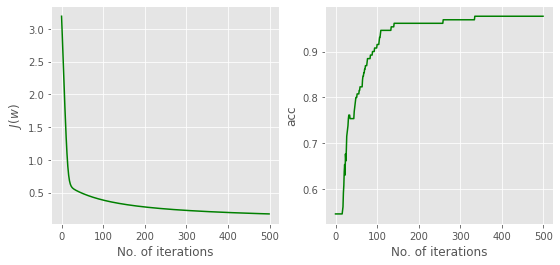

In [7]:
it = [i for i in range(len(clf.cost))]
plt.figure(figsize=(9,4))
plt.subplot(121)
plt.plot(it, clf.cost,'g')
plt.ylabel("$J(w)$")
plt.xlabel("No. of iterations")
plt.subplot(122)
plt.plot(it, clf.acc,'g')
plt.ylabel("acc")
plt.xlabel("No. of iterations")

## 习题 

In [8]:
from sklearn.model_selection import StratifiedKFold, LeaveOneOut 

In [13]:
acc_list = []
sum_acc = 0.0
skf = StratifiedKFold(n_splits=10)
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    clf = LogisticRegression(max_iter=500,learning_rate=0.2)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = (y_pred == y_test).mean()
    acc_list.append(acc)
    sum_acc += acc
print(acc_list)
print(sum_acc / 10.0)

[0.9230769230769231, 0.9230769230769231, 0.9230769230769231, 1.0, 0.9230769230769231, 0.8461538461538461, 1.0, 1.0, 1.0, 1.0]
0.9538461538461538


In [15]:
acc_list = []
sum_acc = 0.0
loo = LeaveOneOut()
m = 0
for train_index, test_index in loo.split(X):
    m += 1
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    clf = LogisticRegression(max_iter=500, learning_rate=0.2)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = (y_pred == y_test).mean()
    acc_list.append(acc)
    sum_acc += acc
print(acc_list)
print(sum_acc /m )

[1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
0.9538461538461539


# Linear Discriminant Analysis 

## 推导 

## 实现 

In [3]:
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import matplotlib.pyplot as plt 
plt.style.use("ggplot")
%matplotlib inline

In [31]:
class LDA:
    """
    Linear discriminant analysis
    """

    def __init__(self):
        self.u0 = None
        self.u1 = None
        self.sigma0 = None
        self.sigma1 = None
        self.w = None
        self.center0 = None
        self.center1 = None

    def fit(self, X, y):
        mask = (y == 0)
        self.u0 = X[mask].mean(axis=0)
        self.u1 = X[~mask].mean(axis=0)
        self.sigma0 = np.cov(X[mask].T)
        self.sigma1 = np.cov(X[~mask].T)
        u, s, v = np.linalg.svd(self.sigma0 + self.sigma1)
        self.w = v / s @ u.T @ (self.u0 - self.u1)
        self.center0 = self.w @ self.u0
        self.center1 = self.w @ self.u1
        return self
        
    def predict(self, X):
        """
        w shape = (n,)
        X shape = (m, n)
        """
        p = X @ self.w
        mask = np.absolute(p - self.center0) < np.absolute(p - self.center1)
        p[mask] = 0
        p[~mask] = 1
        return p

In [24]:
X, y = datasets.load_wine(return_X_y=True)
mask = y < 2
y = y[mask]
X = X[mask,:]
print(X.shape)

(130, 13)


In [34]:
lda = LDA()
lda.fit(X, y)
y_ = lda.predict(X)
print((y == y_).mean())

0.9384615384615385


## 推广到多分类 

In [5]:
class MLDA:
    """
    Linear Discriminant Analysis for muliticlasses
    """
    def __init__(self):
        self.W = None
        self.center = None
        self.u = None
        self.u_mat = None
        self.Sw = None
        self.Sb = None

    def fit(self, X, y):
        m, n = X.shape
        # 求每一类样本的个数
        m_d = dict()
        d = 0
        for elem in y:
            if m_d.get(elem) == None:
                m_d[elem] = 1
                d += 1
            else:
                m_d[elem] += 1

        self.Sw = np.zeros((n, n))
        self.Sb = np.zeros((n, n))
        self.u = X.mean(axis=0)
        u_list = []
        for i in range(d):
            mask = (y == i)
            self.Sw += np.cov(X[mask].T)
            ui = X[mask].mean(axis=0)
            u_list.append(ui)
            self.Sb += m_d[i] * ((ui - self.u) @ (ui - self.u))
        self.u_mat = np.array(u_list)  # shape = d * n
        w, v = np.linalg.eig(np.linalg.inv(self.Sw) @ self.Sb)
        self.W = v[:, :d-1]
        self.center = self.u_mat @ self.W
        return self

    def predict(self, X):
        m = X.shape[0]
        y = np.zeros(m)
        for row, i in zip(X, range(m)):
            projector = row @ self.W
            y[i] = ((projector - self.center) ** 2).sum(axis=1).argmin()
        return y

In [6]:
X, y = datasets.load_wine(return_X_y=True)
mlda = MLDA()
mlda.fit(X,y)
y_ = mlda.predict(X)
print((y_ == y).mean())

0.7359550561797753


In [8]:
X, y = datasets.load_wine(return_X_y=True)
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
mlda = MLDA()
mlda.fit(X,y)
y_ = mlda.predict(X)
print((y_ == y).mean())

0.550561797752809


In [9]:
X, y = datasets.load_wine(return_X_y=True)
scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)
mlda = MLDA()
mlda.fit(X,y)
y_ = mlda.predict(X)
print((y_ == y).mean())

0.8764044943820225


In [10]:
from sklearn.decomposition import PCA

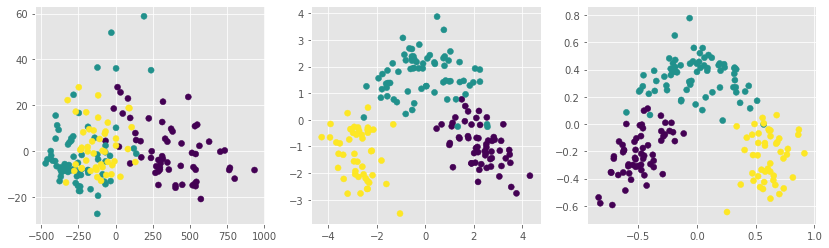

In [13]:
X,y = datasets.load_wine(return_X_y=True)
plt.figure(figsize=(14,4))

X1 = PCA(n_components=2).fit_transform(X)
plt.subplot(131)
plt.scatter(X1[:,0],X1[:,1],c = y)

X2 = StandardScaler().fit_transform(X)
X2 = PCA(n_components=2).fit_transform(X2)
plt.subplot(132)
plt.scatter(X2[:,0],X2[:,1],c = y)

X3 = MinMaxScaler().fit_transform(X)
X3 = PCA(n_components=2).fit_transform(X3)
plt.subplot(133)
plt.scatter(X3[:,0],X3[:,1],c = y)

# Nerual Network

## 推导

### 目标函数

一个输入为$X_{n \times m}$，输出为$Y_{K \times m}$，($n$为输入中特征的数目，$m$为样本的个数，$K$为数据的类别数)，$L$层的神经网络模型其代价函数如下

$$ 
\large\displaystyle J(W,b) = - \frac{1}{m} \sum^{m}_{t=1} \sum^{K}_{k=1} \left[ y^{(t)}_{k}log(\hat{y}^{(t)}_{k}) + (1-y^{(t)}_{k})(log(1-\hat{y}^{(t)}_{k})) \right] + \frac{\lambda}{2m} \sum^{L-1}_{l=1} \sum^{s_{l+1}}_{i=1} \sum^{s_{l}}_{j=1} W^{l}_{i,j}
\tag{1.1}
$$

其中$\large\displaystyle \hat{y} = a^{L}$，可以由式$(1.2)$计算得到,计算过程就是前向传播的过程。

$$
\large\displaystyle
\left\{
{a^{1} = x}
\atop
{a^{l+1} = g(z^{l+1}),\hspace{9pt}z^{l+1} = W^{l}a^{l} + b^{l} \hspace{18pt}l = 2,..,L-1} 
\right.
\tag{1.2}
$$

其中$\large\displaystyle g(z) = \frac{1}{1+e^{(-z)}}$ 为sigmoid函数，全部的隐藏层均使用sigmoid函数，包括输出层。

### 反向传播

不考虑正则项，样本$(x,y)$所产生的代价为
$$
\large\displaystyle
C = - \sum^{K}_{k=1} \left[ y_{k}log(\hat{y}_{k}) + (1-y_{k})(log(1-\hat{y}_{k})) \right]
$$

目标函数可以改写为
$$
\large\displaystyle
J(W,b) = \frac{1}{m} \sum^{m}_{t=1} C^{(t)}
$$

![avatar](NN1.png)

$$\large\displaystyle
\frac{\partial{C}}{\partial{W^{l}_{i,j}}} = \frac{\partial{C}}{\partial{z^{l+1}_{i}}} \frac{\partial{z^{l+1}_{i}}}{\partial{W^{l}_{i,j}}}
$$

$$\large\displaystyle
\text{向量化}
\Rightarrow
\frac{\partial{C}}{\partial{W^{l}_{i,:}}} = \frac{\partial{C}}{\partial{z^{l+1}_{i}}}  \frac{\partial{z^{l+1}_{i}}}{\partial{W^{l}_{i,:}}} = \frac{\partial{C}}{\partial{z^{l+1}_{i}}}(a^{l})^{T}
$$

$$\large\displaystyle
\text{矩阵化}
\Rightarrow
\frac{\partial{C}}{\partial{W^{l}}} =
\left[
\begin{matrix}
\frac{\partial{C}}{\partial{z^{l+1}_{1}}}(a^{l})^{T}
\\ .\\.\\ 
\frac{\partial{C}}{\partial{z^{l+1}_{j}}}(a^{l})^{T}
\\ .\\.\\ 
\frac{\partial{C}}{\partial{z^{l+1}_{s_{l}}}}(a^{l})^{T}
\end{matrix}
\right]
= \frac{\partial{C}}{\partial{z^{l+1}}}(a^{l})^{T}
$$

$$\large\displaystyle
\frac{\partial{C}}{\partial{b^{l}_{i}}} = \frac{\partial{C}}{\partial{z^{l+1}_{i}}} \frac{\partial{z^{l+1}_{i}}}{\partial{b^{l}_{i}}} = \frac{\partial{C}}{\partial{z^{l+1}_{i}}}
$$

$$\large\displaystyle
\text{向量化}
\Rightarrow
\frac{\partial{C}}{\partial{b^{l}}} = \frac{\partial{C}}{\partial{z^{l+1}}}
$$

从上面的公式可知，$a^{l+1}$和$a^{l}$在向前传播的过程中产生，如果我们知道$\frac{\partial{C}}{\partial{z^{l+1}}}$就可以计算出$\frac{\partial{C}}{\partial{W^{l}}}$。
要求$\frac{\partial{C}}{\partial{z^{l+1}}}$可以先研究一下它和$\frac{\partial{C}}{\partial{z^{l+2}}}$的关系。

$$
\large\displaystyle
\begin{array}{rcl}\displaystyle
\frac{\partial{C}}{\partial{z^{l+1}_{j}}} 
& = & \displaystyle\sum^{s_{l+2}}_{i=1} \frac{\partial{C}}{\partial{z^{l+2}_{i}}} \frac{\partial{z^{l+2}_{i}}}{\partial{a^{l+1}_{j}}} \frac{\partial{a^{l+1}_{j}}}{\partial{z^{l+1}_{j}}} \\
& = & \displaystyle\sum^{s_{l+2}}_{i=1} \frac{\partial{C}}{\partial{z^{l+2}_{i}}}W^{l+1}_{i,j} a^{l+1}_{j}(1 - a^{l+1}_{j})  \\ & = & \displaystyle (W^{l+1}_{:,j})^{T} \frac{\partial{C}}{\partial{z^{l+2}}}a^{l+1}_{j}(1 - a^{l+1}_{j})
\end{array}
$$


$$
\large\displaystyle
\text{向量化}
\Rightarrow
\frac{\partial{C}}{\partial{z^{l+1}}} = 
\left[
\begin{matrix}
(W^{l+1}_{:,1})^{T} \frac{\partial{C}}{\partial{z^{l+2}}}a^{l+1}_{1}(1 - a^{l+1}_{1})
\\.\\.\\
(W^{l+1}_{:,j})^{T} \frac{\partial{C}}{\partial{z^{l+2}}}a^{l+1}_{j}(1 - a^{l+1}_{j})
\\.\\.\\
(W^{l+1}_{:,s_{l+1}})^{T} \frac{\partial{C}}{\partial{z^{l+2}}}a^{l+1}_{s_{l+1}}(1 - a^{l+1}_{s_{l+1}})
\end{matrix}
\right]
= (W^{l+1})^{T}\frac{\partial{C}}{\partial{z^{l+2}}}.*a^{l+1}.*(1 - a^{l+1})
$$

由上面的式子可知$\frac{\partial{C}}{\partial{z^{l+1}}}$可由$\frac{\partial{C}}{\partial{z^{l+2}}}$导出。因此，只要求得第一项$\frac{\partial{C}}{\partial{z^{L}}}$，就可以导出其它各项。
$$
\large\displaystyle
\frac{\partial{C}}{\partial{z^{L}_{k}}} = \frac{a^{L}_{k}-y_{k}}{a^{L}_{k}(1 - a^{L}_{k})}a^{L}_{k}(1 - a^{L}_{k}) = a^{L}_{k}-y_{k}
$$

$$
\large\displaystyle
\text{向量化}
\Rightarrow
\frac{\partial{C}}{\partial{z^{L}}} = (a^{L} - y)
$$

令$ \delta^{l} = \frac{\partial{C}}{\partial{z^{l}}}$,则
$$\large\displaystyle
\delta^{L} = a^{L} - y
$$

$$\large\displaystyle
\delta^{l} = (W^{l})^{T}\delta^{l+1}.*a^{l}.*(1 - a^{l})
$$

$$\large\displaystyle
\frac{\partial{C}}{\partial{W^{l}}} 
= \frac{\partial{C}}{\partial{z^{l+1}}}(a^{l})^{T}
= \delta^{l+1}(a^{l})^{T}
$$

$$
\begin{array}{rcl}
\large\displaystyle\frac{\partial{J}}{\partial{W^{l}}} & = & \large\displaystyle\frac{1}{m} \sum^{m}_{t=1} \frac{\partial{C^{(t)}}}{\partial{W^{l}}}\\
& = & \large\displaystyle\frac{1}{m} \sum^{m}_{t=1} \delta^{l+1,(t)}(a^{l,(t)})^{T}\\
& = &\large\displaystyle \frac{1}{m} \Delta^{l+1} (A^{l})^{T}
\end{array}
$$

$$
\begin{array}{rcl}
\large\displaystyle \frac{\partial{J}}{\partial{b^{l}}} 
& = & \large\displaystyle \frac{1}{m} \sum^{m}_{t=1} \frac{\partial{C^{(t)}}}{\partial{b^{l}}}\\
& = & \large\displaystyle \frac{1}{m} \sum^{m}_{t=1} \delta^{l+1,(t)} \\
& = & \large\displaystyle \frac{1}{m} \Delta^{l+1} p
\end{array}
$$

$$\large\displaystyle
\Delta^{l} = (W^{l})^{T}\Delta^{l+1}.*A^{l}.*(1 - A^{l})
$$

其中$\Delta^{l+1} = [\delta^{l+1,(1)},.,\delta^{l+1,(t)},.,\delta^{l+1,(s_{m})}]$，$A^{l} = [a^{l,(1)},.,a^{l,(t)},.,a^{l,(m)}]$，$p = [1]_{m \times 1}$

再加上正则项
$$\large\displaystyle
\frac{\partial{J}}{\partial{W^{l}}} = \frac{1}{m} (\Delta^{l+1} (A^{l})^{T} + \lambda W^{l}) \\
\large\displaystyle
\frac{\partial{J}}{\partial{b^{l}}} = \frac{1}{m} \Delta^{l+1} p
$$

参数更新

$$
\large\displaystyle
W^{l} = W^{l} - \alpha \frac{\partial{J}}{\partial{W^{l}}}\\
\large\displaystyle
b^{l} = b^{l} - \alpha \frac{\partial{J}}{\partial{b^{l}}} 
$$

## 实现

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import LabelBinarizer, Normalizer
plt.style.use("ggplot")
%matplotlib inline

In [ ]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def plot_learningCurve(loss_list):
    n = len(loss_list)
    fig, ax = plt.subplots(figsize=(6,4))
    x = [i for i in range(len(clf.loss))]
    ax.plot(x,clf.loss)
    ax.set_xlabel("No. of iterations")
    ax.set_ylabel("J")

class NerualNetwork:

    def __init__(self, layer_list=[], learning_rate=0.01, alpha=1.0, max_iter=200):
        self.learning_rate = learning_rate
        self.alpha = alpha
        self.max_iter = max_iter
        self.layer_list = layer_list
        self.n_layers = len(layer_list)
        self.n_outputs = layer_list[-1]
        self.loss = []
        self.weights = {}
        self.bias = {}
        self.tmp = {}

        for i in range(1, self.n_layers, 1):
            n_cur = self.layer_list[i-1]
            n_next = self.layer_list[i]
            self.weights["W" + str(i)] = np.random.normal(size=(n_next, n_cur))
            self.bias["b" + str(i)] = np.random.normal(size=(n_next, 1))
        #   print("W" + str(i) + "  ",self.weights["W" + str(i)].shape)
        #   print("b" + str(i) + "  ",self.bias["b" + str(i)].shape)

    def __compute_loss(self, Y, Y_):
        m = Y.shape[1]
        loss = None
        loss = (- Y * np.log(Y_) - (1 - Y) * np.log(1 - Y_)).sum()
        for i in range(1, self.n_layers, 1):
            W = self.weights["W" + str(i)]
            loss += 0.5 * self.alpha * W.sum()
        loss /= m
        return loss

    def fit(self, X, Y):
        m = X.shape[1]
        it = 0
        while it < self.max_iter:
            self.tmp["A1"] = X
            for i in range(1, self.n_layers, 1):
                # 1,...,L - 1
                A = self.tmp["A" + str(i)]
                W = self.weights["W" + str(i)]
                b = self.bias["b" + str(i)]
                # print("W: ", W.shape)
                # print("A: ", A.shape)
                # print("b: ", b.shape)
                self.tmp["A" + str(i + 1)] = sigmoid(W @ A + b)
            self.loss.append(self.__compute_loss(
                Y, self.tmp["A" + str(self.n_layers)]))
            delta = self.tmp["A" + str(self.n_layers)] - Y
            for i in range(self.n_layers - 1, 1, -1):
                # L-1,.,2
                W = self.weights["W" + str(i)]
                b = self.bias["b" + str(i)]
                A = self.tmp["A" + str(i)]
                tmp = W.T @ delta * A * (1 - A)
                DW = (delta @ A.T + self.alpha * W) / m
                Db = delta.sum(axis=1, keepdims=True) / m
                self.weights["W" + str(i)] = W - self.learning_rate * DW
                self.bias["b" + str(i)] = b - self.learning_rate * Db
                delta = tmp
            it += 1

        for i in range(1, self.n_layers + 1, 1):
            del self.tmp["A" + str(i)]

        return self

    def predict(self, X):
        A = X
        for i in range(1, self.n_layers, 1):
            W = self.weights["W" + str(i)]
            b = self.bias["b" + str(i)]
            Z = W @ A + b
            A = sigmoid(Z)
        return A


In [3]:
X, y = datasets.load_iris(return_X_y=True)
X = X.T
ovl = LabelBinarizer()
Y = ovl.fit_transform(y)
Y = Y.T

0.8333333333333334

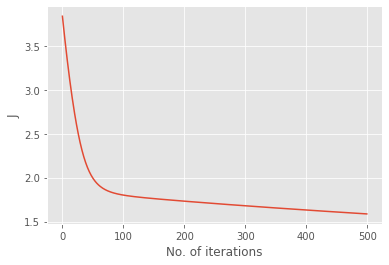

In [36]:
clf = NerualNetwork(layer_list=[4, 20, 20, 3],max_iter= 500)
clf.fit(X,Y)
plot_learningCurve(clf.loss)
Y_ = clf.predict(X)
y_ = Y_.argmax(axis = 0)
(y_ == y).mean()

# KMeans 

In [ ]:
import numpy as np
from sklearn import svm
from sklearn import datasets
import matplotlib.pyplot as plt
%matplotlib qt5

In [ ]:
class KMeans:
    """[K-Means clustering.]
    """

    def __init__(self, n_clusters=4, max_iter=300, tol=1e-5):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.tol = tol
        self.cost = []
        # array of shape (n_clusters, n_features)
        self.cluster_centers = None

    def fit(self, X):
        """[Compute K-means clustering.]

        Arguments:
            X {[array]} -- [shape = (n_examples, n_features)]
        """
        n_examples = X.shape[0]
        # initialize
        random_idx = np.random.permutation(
            n_examples)[:self.n_clusters].tolist()
        self.cluster_centers = X[random_idx, :]
        # record the idx of examples belonging to the cluster centers
        tag = [[] for i in range(self.n_clusters)]
        # record the cost
        self.cost.clear()
        pre_cost = 0.0
        cost = 0.0

        iter = 0
        while (iter < self.max_iter):
            cost_arr = np.zeros(self.n_clusters, dtype='float')
            count = np.zeros(self.n_clusters, dtype='int')
            for i in tag:
                i.clear()

            for i in range(n_examples):
                diff = self.cluster_centers - X[i, :]
                dist = (diff * diff).sum(axis=1)
                min_idx = dist.argmin()
                tag[min_idx].append(i)
                cost_arr[min_idx] += dist[min_idx]
                count[min_idx] += 1

            # update the cluster centers, ignore the centers without examples belonging to them
            for i in range(self.n_clusters):
                if count[i] != 0:
                    self.cluster_centers[i, :] = X[tag[i], :].mean(
                        axis=0, keepdims=True)

            # compute and store the cost
            pre_cost = cost
            cost = cost_arr.sum()
            self.cost.append(cost / n_examples)
            #print("iter = %d Cost = %f diff = %f" % (iter, cost, pre_cost - cost))
            if (iter != 0) and (pre_cost - cost < self.tol):
                break
            iter += 1

    def predict(self, X):
        """[Predict the closest cluster each example in X belongs to]

        Arguments:
            X {[array]} -- [shape = (n_samples, n_features)]
        """
        n_samples = X.shape[0]
        tag = np.zeros(n_samples, dtype='int')
        for i in range(n_samples):
            diff = self.cluster_centers - X[i, :]
            dist = (diff * diff).sum(axis=1)
            min_idx = dist.argmin()
            tag[i] = min_idx
        return tag


In [ ]:
X, y = datasets.load_iris(return_X_y=True)
knn = KMeans(n_clusters=3)
knn.fit(X[:, [0, 3]])
tag = knn.predict(X[:, [0, 3]])

In [ ]:
fig, axes = plt.subplots(nrows = 1,ncols = 2)
fig.tight_layout()

In [ ]:
axes[0].scatter(X[:, 0], X[:, 3], c=y)
axes[0].grid(linestyle="--")
axes[0].set_title("True clusters")
axes[0].set_xlabel("X label")
axes[0].set_ylabel("Y label")

In [ ]:
axes[1].scatter(X[:, 0], X[:, 3], c=tag)
axes[1].grid( linestyle="--")
axes[1].set_title("predicted clusters")
axes[1].set_xlabel("X label")
axes[1].set_ylabel("Y label")

In [ ]:
fig.savefig("scatter.png",dpi=800)

In [ ]:
plt.figure()
plt.plot([i for i in range(len(knn.cost))], knn.cost)
plt.grid()
plt.xlabel("No. of iteration")
plt.ylabel("Cost")

# DBSCAN

In [ ]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
import queue
import random
from sklearn.cluster import DBSCAN as DBS
import time

In [ ]:
class DBSCAN:

    def __init__(self, eps=0.5, min_samples=5, metric="euclidean"):
        """[summary]

        Keyword Arguments:
            eps {float} -- [The maximum distance between two samples for one to be considered as in the neighborhood of the other] (default: {0.5})
            min_samples {int} -- [The number of samples in a neighborhood for a point to be considered as a core point] (default: {5})
            metric {str} -- [description] (default: {"euclidean"})
        """
        self.eps_square = eps ** 2
        self.min_samples = min_samples

    def fit_predict(self, X):
        """[Perform DBSCAN clustering from features or distance matrix]

        Arguments:
            X {[array]} -- [shape = (n_samples, n_features)]
        """
        n_samples = X.shape[0]
        core_set = set()
        neighbor = [set() for i in range(n_samples)]
        for j in range(n_samples):
            diff = X - X[j, :]
            dist_square = (diff * diff).sum(axis=1)
            for i in range(n_samples):
                if dist_square[i] < self.eps_square:
                    neighbor[j].add(i)
            if len(neighbor[j]) >= self.min_samples:
                core_set.add(j)
        clusters = []
        k = 0
        unvistied = set([i for i in range(n_samples)])
        while len(core_set) > 0:
            unvistied_old = set(unvistied)
            rdx = unvistied.pop()  # 应该是随机选一个的，这里默认选第一个
            Q = queue.SimpleQueue()
            Q.put(rdx)
            while not Q.empty():
                q = Q.get()
                if len(neighbor[q]) >= self.min_samples:
                    delta = neighbor[q].intersection(unvistied)
                    for item in delta:
                        Q.put(item)
                        unvistied.discard(item)
            clusters.append(unvistied_old.difference(unvistied))
            core_set.difference_update(clusters[k])
            k += 1
        y = np.zeros(n_samples, dtype='int')
        for i in range(k):
            for item in clusters[i]:
                y[item] = i
        return y

In [ ]:
X, y = datasets.load_iris(return_X_y=True)
db1 = DBS(eps=0.4, min_samples=10)
db2 = DBSCAN(eps=0.4, min_samples=10)
tag1 = db1.fit_predict(X[:, [0, 3]])
tag2 =db2.fit_predict(X[:, [0, 3]])

In [ ]:
def cluster_scatter(axe, X, tag, title):
    axe.scatter(X[:, 0], X[:, 3], c = tag)
    axe.grid(linestyle="--")
    axe.set_title(title)

In [ ]:
fig, axes = plt.subplots(nrows=1 ,ncols = 3,figsize=(16,4))
fig.tight_layout()
cluster_scatter(axes[0],X,y,"True clusters")
cluster_scatter(axes[1],X,tag1,"Clusters generated by Sklearn DBSCAN")
cluster_scatter(axes[2],X,tag2,"Clusters generated by my DBSCAN")
fig.savefig("dbscan.png",dpi = 1000)

# PCA

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA as PC
%matplotlib qt5

In [ ]:
class PCA:
    """[Principal component analysis]
    """

    def __init__(self, n_components=None):
        """[summary]

        Keyword Arguments:
            n_components {[int]} -- [Number of components to keep] (default: {None})
        """
        self.n_components = n_components

        # array, shape = (n_components,)
        self.explained_variance_ = None

        # array, shape = (n_components,)
        self.explained_variance_ratio = None

        # array, shape = (n_compnents, n_features)
        self.components_ = None

        # array, shape = (n_comonents,)
        self.singular_values_ = None

        # array, shape = (n_features,)
        self.mean_ = None

    def fit_transform(self, X):
        """[summary]

        Arguments:
            X {[array]} -- [shape = (n_samples, n_features)]
        """
        # mean normalization
        self.mean_ = X.mean(axis=1,keepdims=True)
        X = X - self.mean_

        # covariance matrix
        sigma = X @ X.T

        # singular value decompsition
        # sigma = u @ s @ vh
        # u 2D-array, s 1D-array, vh 2D-array
        u, s, vh = np.linalg.svd(sigma)
        self.components_ = u[:, :self.n_components]
        self.explained_variance_ = s[:self.n_components]
        self.explained_variance_ratio = self.explained_variance_ / self.explained_variance_.sum() 
        self.singular_values_ = s
        return self.components_.T @ X

In [ ]:
X, y = datasets.load_iris(return_X_y=True)
X = X.T
pca1 = PCA(3)
X_ = pca1.fit_transform(X)
print(pca1.explained_variance_ratio)

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X_[0,:],X_[1,:],X_[2,:],c = y)
fig.show()


In [ ]:
pca2 = PCA(2)
X_2 = pca2.fit_transform(X)
fig, ax = plt.subplots()
ax.scatter(X_2[0,],X_2[1, ],c = y)
ax.grid(linestyle="--")
fig.show()

# Decision Tree

In [3]:
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib .pyplot as plt
%matplotlib inline 

C:\Users\Administrator\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\Administrator\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\Administrator\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [4]:
from decisiontree import DecisionTree

In [23]:
df = pd.read_csv("watermaleon.csv", encoding="ansi")
X = df[['色泽', '根蒂', '敲声', '纹理', '脐部', '触感', '密度', '含糖率']].to_numpy()
y = df['好瓜'].values
df.head()

,编号,色泽,根蒂,敲声,纹理,脐部,触感,密度,含糖率,好瓜,序关系
0,1,青绿,蜷缩,浊响,清晰,凹陷,硬滑,0.697,0.460,是,1
1,2,乌黑,蜷缩,沉闷,清晰,凹陷,硬滑,0.774,0.376,是,1
2,3,乌黑,蜷缩,浊响,清晰,凹陷,硬滑,0.634,0.264,是,1
3,4,青绿,蜷缩,沉闷,清晰,凹陷,硬滑,0.608,0.318,是,1
4,5,浅白,蜷缩,浊响,清晰,凹陷,硬滑,0.556,0.215,是,1


In [6]:
from sklearn.utils.multiclass import type_of_target

In [9]:
type_of_target(X[:,6]) == "unknown"

True

# 巨坑

## 数组的维度和广播 

In [ ]:
np.random.seed(1)
a = np.random.normal(size= (2,1))
np.random.seed(1)
b = np.random.normal(size= 2)
print("a: ", a)
print("b: ", b)
print(a == b)
print(a.squeeze() == b)